Seçtiğiniz bir veri seti üzerinde veri analizi yapın.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [72]:
data = pd.read_csv('5g_coverage_worldwide.csv')
data.head()

,operator,city_name,deployment_type,status,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,Commercial Availability,29.35186,47.98369
1,Optus,Canberra,5G NR,Commercial Availability,-35.28200,149.12868
2,Optus,Sydney,5G NR,Commercial Availability,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,Commercial Availability,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,Commercial Availability,33.74900,-84.38798


In [73]:
data

,operator,city_name,deployment_type,status,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,Commercial Availability,29.35186,47.98369
1,Optus,Canberra,5G NR,Commercial Availability,-35.28200,149.12868
2,Optus,Sydney,5G NR,Commercial Availability,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,Commercial Availability,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,Commercial Availability,33.74900,-84.38798
...,...,...,...,...,...,...
145582,TIM,Atibaia,5G NR,Commercial Availability,-23.11755,-46.55671
145583,Slovak Telekom,Želiezovce,5G NR,Commercial Availability,48.04902,18.65403
145584,Slovak Telekom,Rimavská Sobota,5G NR,Commercial Availability,48.38123,20.01955
145585,Slovak Telekom,Medzilaborce,5G NR,Commercial Availability,49.27483,21.90650


In [74]:
data.head(10)

,operator,city_name,deployment_type,status,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,Commercial Availability,29.35186,47.98369
1,Optus,Canberra,5G NR,Commercial Availability,-35.28200,149.12868
2,Optus,Sydney,5G NR,Commercial Availability,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,Commercial Availability,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,Commercial Availability,33.74900,-84.38798
5,AT&T Mobility,"Indianapolis, IN",5G NR,Commercial Availability,39.76840,-86.15807
6,AT&T Mobility,"Louisville, KY",5G NR,Commercial Availability,38.25266,-85.75846
7,AT&T Mobility,"Charlotte, NC",5G NR,Commercial Availability,35.22709,-80.84313
8,AT&T Mobility,"Raleigh, NC",5G NR,Commercial Availability,35.77959,-78.63818
9,AT&T Mobility,"Oklahoma City, OK",5G NR,Commercial Availability,35.46756,-97.51643


In [75]:
data[["latitude"]].isnull().sum()

latitude    0
dtype: int64

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145587 entries, 0 to 145586
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   operator         145587 non-null  object 
 1   city_name        145587 non-null  object 
 2   deployment_type  145587 non-null  object 
 3   status           145587 non-null  object 
 4   latitude         145587 non-null  float64
 5   longitude        145587 non-null  float64
dtypes: float64(2), object(4)
memory usage: 6.7+ MB


In [77]:
data = data.drop(["status"],axis = 1)
data.head()

,operator,city_name,deployment_type,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,29.35186,47.98369
1,Optus,Canberra,5G NR,-35.28200,149.12868
2,Optus,Sydney,5G NR,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,33.74900,-84.38798


In [78]:
data.isnull().sum()

operator           0
city_name          0
deployment_type    0
latitude           0
longitude          0
dtype: int64

In [79]:
data = data.reset_index(drop=True)
data.head()

,operator,city_name,deployment_type,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,29.35186,47.98369
1,Optus,Canberra,5G NR,-35.28200,149.12868
2,Optus,Sydney,5G NR,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,33.74900,-84.38798


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145587 entries, 0 to 145586
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   operator         145587 non-null  object 
 1   city_name        145587 non-null  object 
 2   deployment_type  145587 non-null  object 
 3   latitude         145587 non-null  float64
 4   longitude        145587 non-null  float64
dtypes: float64(2), object(3)
memory usage: 5.6+ MB


In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,145587.0,40.768559,18.177032,-54.93521,39.10615,45.91663,49.98052,78.22317
longitude,145587.0,-17.713075,60.066797,-166.53324,-77.88026,1.77697,11.73522,178.45008


In [82]:
data['city_name'].unique()

array(['Abdullah al-Salem', 'Canberra', 'Sydney', ..., 'Atibaia',
       'Rimavská Sobota', 'Nováky'], dtype=object)

In [83]:
data[data['operator']== "Optus"]

,operator,city_name,deployment_type,latitude,longitude
1,Optus,Canberra,5G NR,-35.282000,149.128680
2,Optus,Sydney,5G NR,-33.867480,151.206980
1056,Optus,Dudley,5G NR,-32.990200,151.718030
1057,Optus,Central Coast,5G NR,-33.300100,151.191100
1058,Optus,Brisbane,5G NR,-27.471000,153.023450
...,...,...,...,...,...
22903,Optus,Coburg North,5G NR,-37.724348,144.967520
22904,Optus,Joondalup,5G NR,-31.743077,115.772118
22905,Optus,Mount Eliza,5G NR,-38.183776,145.089279
24105,Optus,Bathurst,5G NR,-33.416638,149.580494


In [84]:
data.groupby('city_name')[['deployment_type']].count()

,deployment_type
city_name,
(Campus Universitario),2
100 Mile House,1
15 de Septiembre,1
17 de Junio,1
18 de Marzo,1
...,...
Žíšov,1
Žďár,1
Žďár nad Metují,1


In [85]:
data_city_name =  data.groupby('city_name')[['deployment_type']].count().reset_index().rename(columns={'city_name':"deployment"})
data_city_name

,deployment,deployment_type
0,(Campus Universitario),2
1,100 Mile House,1
2,15 de Septiembre,1
3,17 de Junio,1
4,18 de Marzo,1
...,...,...
104005,Žíšov,1
104006,Žďár,1
104007,Žďár nad Metují,1
104008,Žďár nad Orlicí,1


In [86]:
data.head()

,operator,city_name,deployment_type,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,29.35186,47.98369
1,Optus,Canberra,5G NR,-35.28200,149.12868
2,Optus,Sydney,5G NR,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,33.74900,-84.38798


In [87]:
data.head()

,operator,city_name,deployment_type,latitude,longitude
0,Ooredoo,Abdullah al-Salem,5G NR,29.35186,47.98369
1,Optus,Canberra,5G NR,-35.28200,149.12868
2,Optus,Sydney,5G NR,-33.86748,151.20698
3,AT&T Mobility,"Jacksonville, FL",5G NR,30.33218,-81.65565
4,AT&T Mobility,"Atlanta, GA",5G NR,33.74900,-84.38798


In [88]:
data.iloc[4,2]

'5G NR'

In [89]:
data.columns

Index(['operator', 'city_name', 'deployment_type', 'latitude', 'longitude'], dtype='object')

In [90]:
import pandas as pd

veriler = pd.DataFrame({
    "operator": ["Ooredoo", "Optus", "Optus", "AT&T Mobility", "AT&T Mobility"],
    "city_name": ["Abdullah al-Salem", "Canberra", "Sydney", "Jacksonville, FL", "Atlanta, GA"],
    "deployment_type": ["5G NR", "5G NR", "5G NR", "5G NR", "5G NR"],
    "latitude": [29.35186, -35.28200, -33.86748, 30.33218, 33.74900],
    "longitude": [47.98369, 149.12868, 151.20698, -81.65565, -84.3879]
})
print(veriler)

        operator          city_name deployment_type  latitude  longitude
0        Ooredoo  Abdullah al-Salem           5G NR  29.35186   47.98369
1          Optus           Canberra           5G NR -35.28200  149.12868
2          Optus             Sydney           5G NR -33.86748  151.20698
3  AT&T Mobility   Jacksonville, FL           5G NR  30.33218  -81.65565
4  AT&T Mobility        Atlanta, GA           5G NR  33.74900  -84.38790


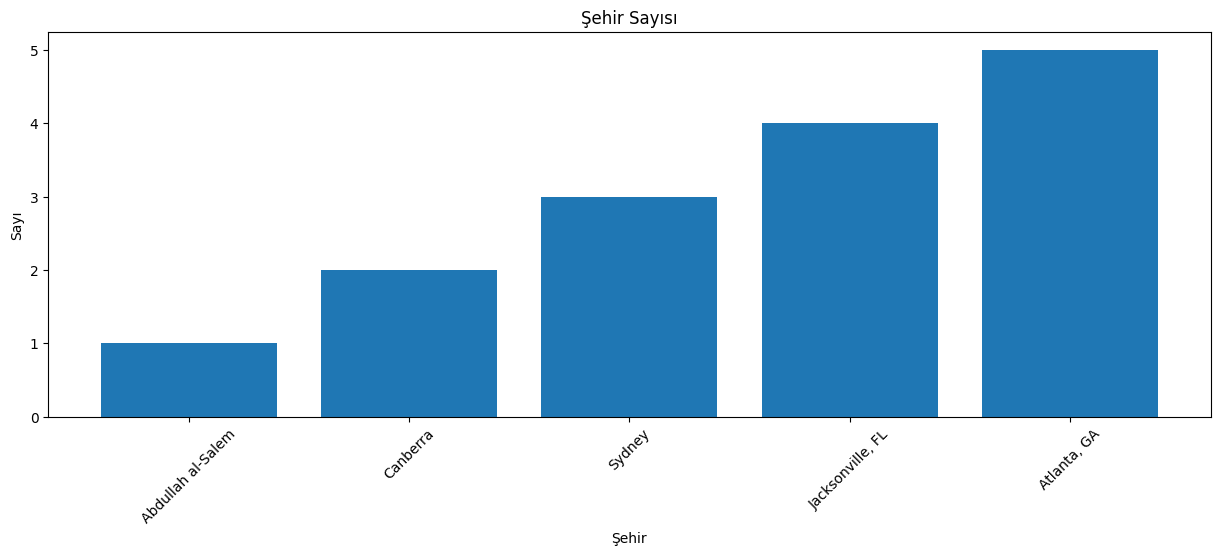

In [91]:
import matplotlib.pyplot as plt

city_name = ["Abdullah al-Salem", "Canberra", "Sydney", "Jacksonville, FL", "Atlanta, GA"]
count = [1, 2, 3, 4, 5]

plt.figure(figsize=(15, 5))
plt.bar(city_name, count)

plt.xlabel("Şehir")
plt.ylabel("Sayı")
plt.title("Şehir Sayısı")

plt.xticks(rotation=45)
plt.show()

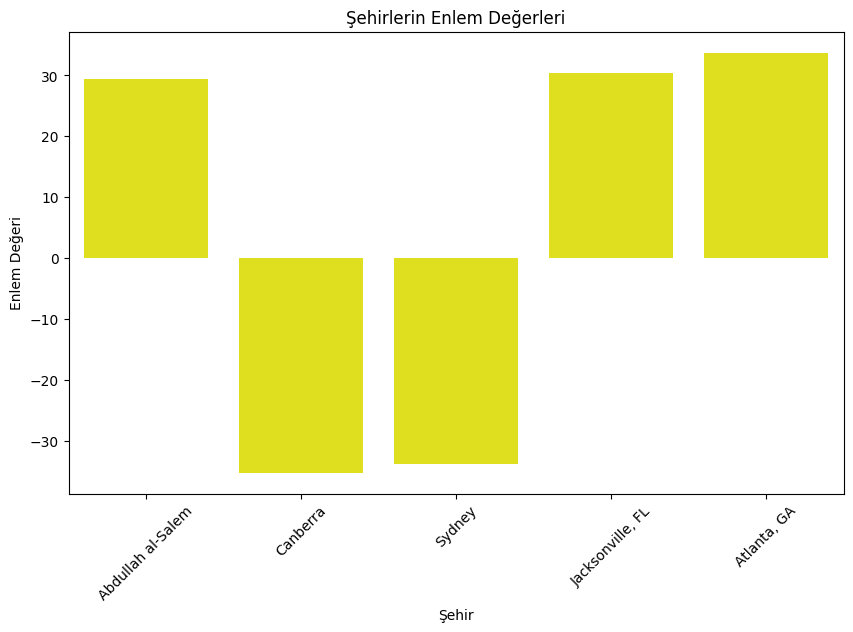

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x="city_name", y="latitude", data=veriler, color="yellow")

plt.title("Şehirlerin Enlem Değerleri")
plt.xlabel("Şehir")
plt.ylabel("Enlem Değeri")

plt.xticks(rotation=45)

plt.show()


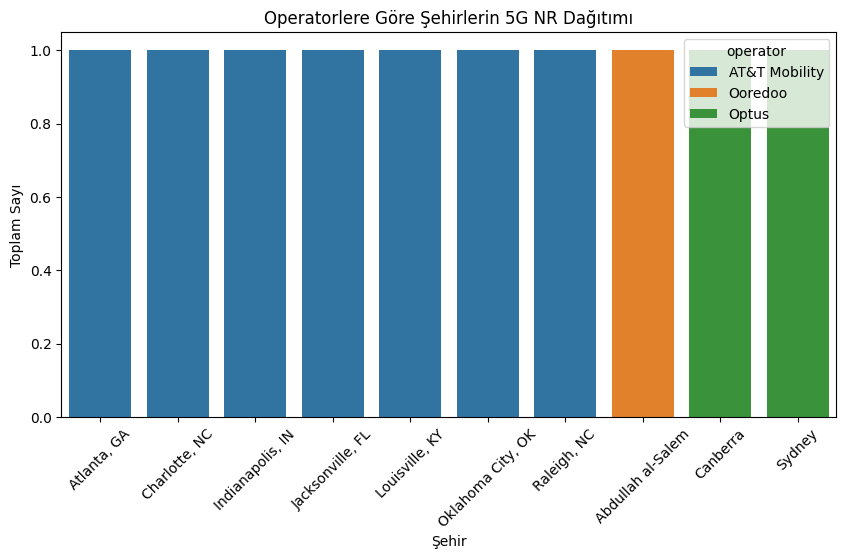

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    "operator": [
        "Ooredoo", "Optus", "Optus", "AT&T Mobility", "AT&T Mobility",
        "AT&T Mobility", "AT&T Mobility", "AT&T Mobility", "AT&T Mobility", "AT&T Mobility"
    ],
    "city_name": [
        "Abdullah al-Salem", "Canberra", "Sydney", "Jacksonville, FL", "Atlanta, GA",
        "Indianapolis, IN", "Louisville, KY", "Charlotte, NC", "Raleigh, NC", "Oklahoma City, OK"
    ],
    "deployment_type": ["5G NR"] * 10,
    "status": ["Commercial Availability"] * 10,
    "latitude": [29.35186, -35.28200, -33.86748, 30.33218, 33.74900, 39.76840, 38.25266, 35.22709, 35.77959, 35.46756],
    "longitude": [47.98369, 149.12868, 151.20698, -81.65565, -84.38798, -86.15807, -85.75846, -80.84313, -78.63818, -97.51643]
}

df = pd.DataFrame(data)

df_retailer_region = df.groupby(["operator", "city_name", "deployment_type"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 5))
sns.barplot(data=df_retailer_region, x="city_name", y="Count", hue="operator")

plt.title("Operatorlere Göre Şehirlerin 5G NR Dağıtımı")
plt.xlabel("Şehir")
plt.ylabel("Toplam Sayı")

plt.xticks(rotation=45)

plt.show()

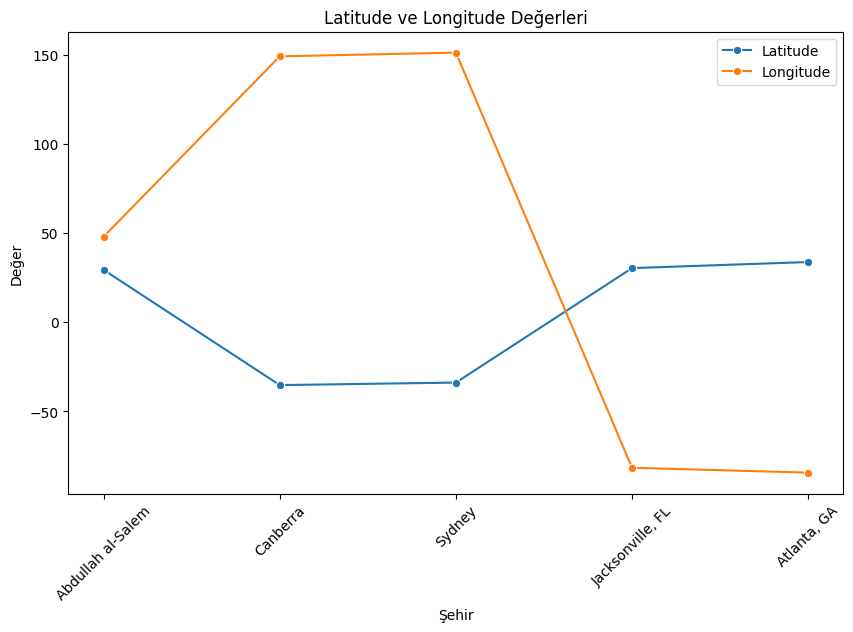

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x="city_name", y="latitude", data=veriler, marker="o", label="Latitude")
sns.lineplot(x="city_name", y="longitude", data=veriler, marker="o", label="Longitude")

plt.title("Latitude ve Longitude Değerleri")
plt.xlabel("Şehir")
plt.ylabel("Değer")

plt.xticks(rotation=45)

plt.legend()

plt.show()


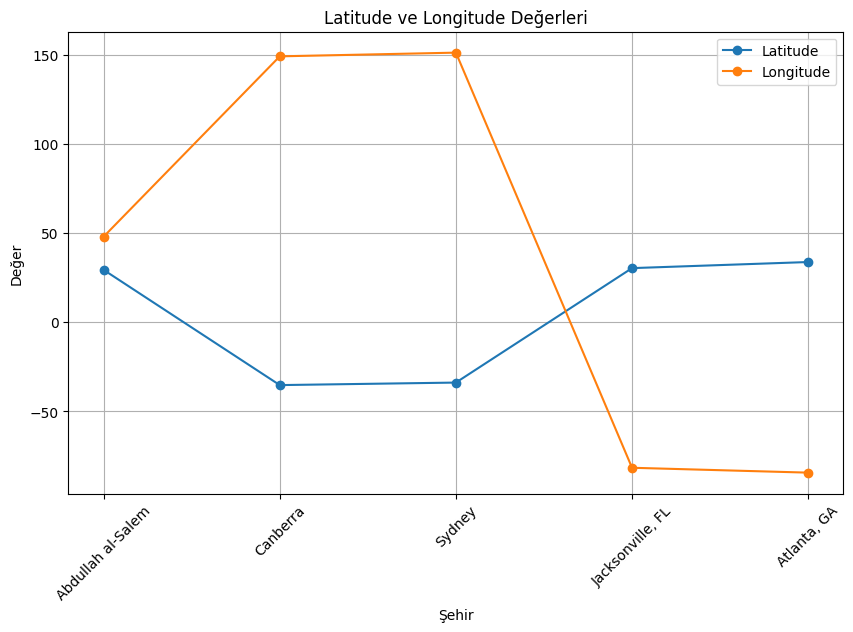

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(veriler['city_name'], veriler['latitude'], marker='o', label='Latitude')
plt.plot(veriler['city_name'], veriler['longitude'], marker='o', label='Longitude')

plt.title('Latitude ve Longitude Değerleri')
plt.xlabel('Şehir')
plt.ylabel('Değer')

plt.xticks(rotation=45)

plt.legend()
plt.grid(True)

plt.show()


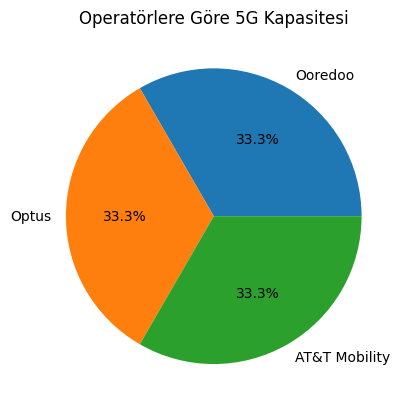

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'operatör': ['Ooredoo', 'Optus', 'AT&T Mobility'],
    'şehir_adı': ['Abdullah al-Salem', 'Canberra', 'Jacksonville, FL'],
    'yerleşim_türü': ['5G NR', '5G NR', '5G NR'],
    'durum': ['Ticari Kullanıma Uygun', 'Ticari Kullanıma Uygun', 'Ticari Kullanıma Uygun'],
    'enlem': [29.35186, -35.28200, 30.33218],
    'boylam': [47.98369, 149.12868, -81.65565]
})

plt.figure()
plt.pie(data['operatör'].value_counts(), labels=data['operatör'], autopct="%1.1f%%")
plt.title("Operatörlere Göre 5G Kapasitesi")
plt.show()
